# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [28]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [30]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [31]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [34]:
# Extract all rows of data
table = soup.find('table', class_="table")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [35]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for row in table.find_all('tr')[1:]:  
    # Skip the header row
    columns = row.find_all('td')
    data = {
        'id': int(columns[0].text),
        'terrestrial_date': columns[1].text,
        'sol': int(columns[2].text),
        'ls': float(columns[3].text),
        'month': columns[4].text,
        'min_temp': float(columns[5].text),
        'pressure': float(columns[6].text)
    }
    rows.append(data)

In [36]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create a Pandas DataFrame
df = pd.DataFrame(rows, columns=columns)

In [37]:
# Confirm DataFrame was created successfully
print(df)

        id terrestrial_date   sol     ls month  min_temp  pressure
0        2       2012-08-16    10  155.0     6     -75.0     739.0
1       13       2012-08-17    11  156.0     6     -76.0     740.0
2       24       2012-08-18    12  156.0     6     -76.0     741.0
3       35       2012-08-19    13  157.0     6     -74.0     732.0
4       46       2012-08-20    14  157.0     6     -74.0     740.0
...    ...              ...   ...    ...   ...       ...       ...
1862  1889       2018-02-23  1973  133.0     5     -78.0     730.0
1863  1892       2018-02-24  1974  134.0     5     -77.0     729.0
1864  1894       2018-02-25  1975  134.0     5     -76.0     729.0
1865  1893       2018-02-26  1976  135.0     5     -77.0     728.0
1866  1895       2018-02-27  1977  135.0     5     -77.0     727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [40]:
# Examine data type of each column
print(df.dtypes)

id                    int64
terrestrial_date     object
sol                   int64
ls                  float64
month                object
min_temp            float64
pressure            float64
dtype: object


In [41]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [42]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [44]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts()
sorted_month_counts = month_counts.sort_index()
print(sorted_month_counts)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [46]:
# 2. How many Martian days' worth of data are there?
martian_days = df['sol'].nunique()
print(f"Number of Martian days worth of data: {martian_days}")

Number of Martian days worth of data: 1867


In [47]:
# 3. What is the average low temperature by month?
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()
sorted_average_low_temp = average_low_temp_by_month.sort_index()
print(sorted_average_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


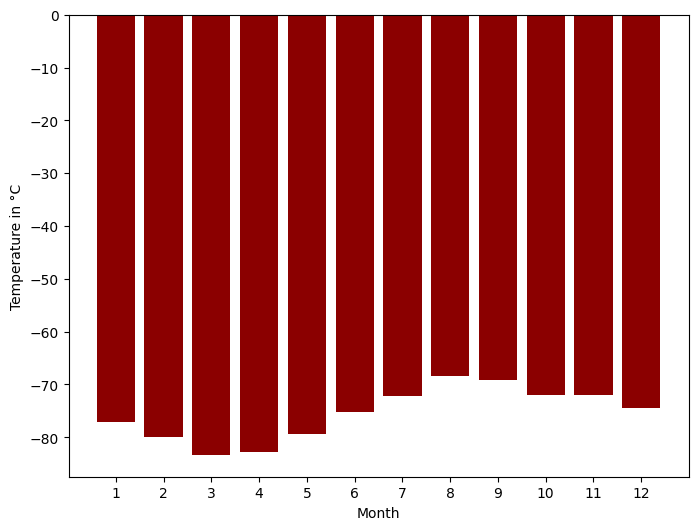

In [106]:
# Plot the average temperature by month
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Results as a vertical bar chart
plt.figure(figsize=(8, 6))
plt.bar(sorted_average_low_temp.index, sorted_average_low_temp.values, color='darkred')
plt.xlabel('Month')
plt.ylabel('Temperature in °C')
plt.xticks(sorted_average_low_temp.index)

# Display plot
plt.show()

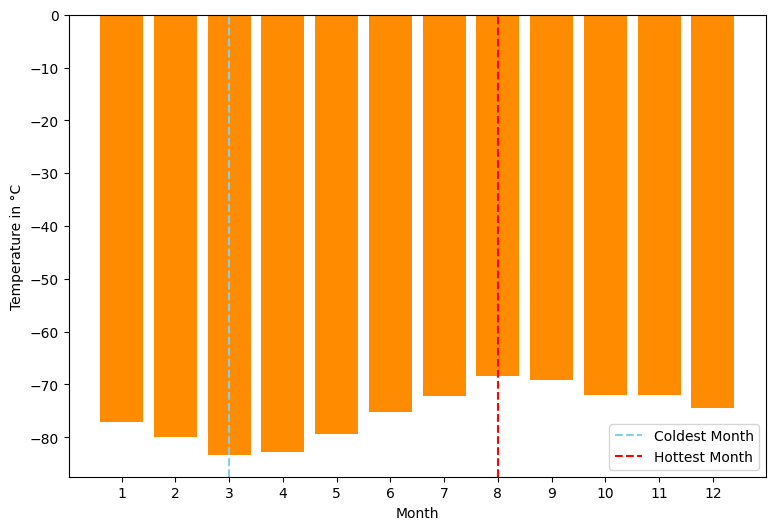

In [105]:
# Identify the coldest and hottest months in Curiosity's location
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Plot the results as a vertical bar chart
plt.figure(figsize=(9, 6))
plt.bar(sorted_average_low_temp.index, sorted_average_low_temp.values, color='darkorange')
plt.xlabel('Month')
plt.ylabel('Temperature in °C')
plt.xticks(sorted_average_low_temp.index)

# Highlight the coldest and hottest months
plt.axvline(x=coldest_month, color='skyblue', linestyle='--', label='Coldest Month')
plt.axvline(x=hottest_month, color='red', linestyle='--', label='Hottest Month')

# Add legend
plt.legend()

# Display the plot
plt.show()

In [91]:
# 4. Average pressure by Martian month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Display the average atmospheric pressure by Martian month
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


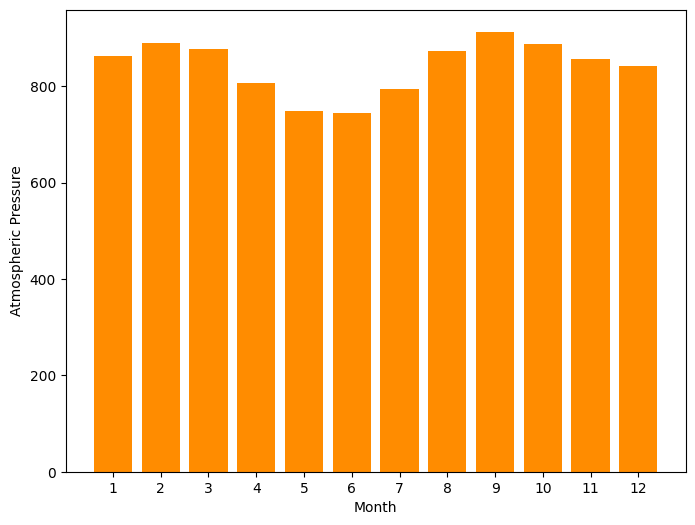

In [104]:
# Plot the average pressure by month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the results as a bar chart
plt.figure(figsize=(8, 6))
plt.bar(average_pressure_by_month.index, average_pressure_by_month.values, color='darkorange')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(average_pressure_by_month.index)

# Display the plot
plt.show()

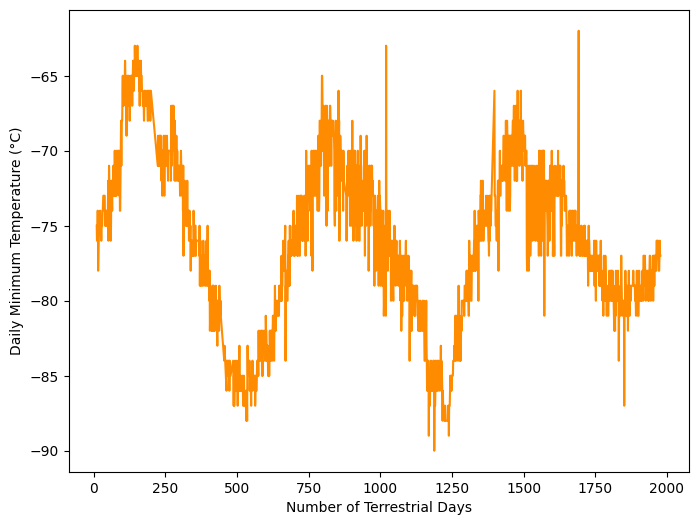

In [109]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Plot the daily minimum temperatures for each Martian day
plt.figure(figsize=(8, 6))
plt.plot(df['sol'], df['min_temp'], color='darkorange')
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Daily Minimum Temperature (°C)')

# Display the plot
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [110]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [111]:
browser.quit()